In [95]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [96]:
file_path = ("C:/Users/adaiu/OneDrive/Desktop/Analysis Projects/Electric-Car-Data-Analysis/Resources/Charging Stations/alt_fuel_stations (Mar 9 2022).csv")
altfuel_df = pd.read_csv(file_path)
altfuel_df.head()

C:\Users\adaiu\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (6,10,20,31,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
altfuel_df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [98]:
altfuel_df.dtypes.value_counts()

float64    33
object     31
int64       1
dtype: int64

In [99]:
altfuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49728 entries, 0 to 49727
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    49728 non-null  object 
 1   Station Name                      49728 non-null  object 
 2   Street Address                    49695 non-null  object 
 3   Intersection Directions           2557 non-null   object 
 4   City                              49728 non-null  object 
 5   State                             49728 non-null  object 
 6   ZIP                               49728 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     46564 non-null  object 
 9   Status Code                       49728 non-null  object 
 10  Expected Date                     147 non-null    object 
 11  Groups With Access Code           49728 non-null  object 
 12  Acce

In [100]:
altfuel_df = altfuel_df[['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State', 'ZIP', 'Access Days Time', 'EV Network',
          'Geocode Status', 'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At', 'Open Date', 'EV Connector Types', 
          'Country']]
altfuel_df.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Network,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,Fleet use only,Non-Networked,GPS,34.248319,-118.387971,2021-07-14,1517,2022-02-10 19:42:29 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,NaN,Non-Networked,200-8,34.052542,-118.448504,2021-07-14,1519,2022-02-10 19:42:29 UTC,2020-02-28,J1772,US
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,24 hours daily; pay lot,Non-Networked,GPS,34.040539,-118.271387,2020-11-09,1523,2021-03-11 23:22:17 UTC,1995-08-30,J1772,US
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,For fleet and employee use only,Non-Networked,GPS,34.059133,-118.248589,2021-07-14,1525,2022-02-10 19:42:29 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,Fleet use only,Non-Networked,GPS,33.759802,-118.096665,2021-07-14,1531,2022-02-10 19:42:29 UTC,2018-05-01,CHADEMO J1772 J1772COMBO,US


In [101]:
altfuel_df.set_index('ID', inplace = True)
altfuel_df.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Network,Geocode Status,Latitude,Longitude,Date Last Confirmed,Updated At,Open Date,EV Connector Types,Country
ID,,,,,,,,,,,,,,,,
1517,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,Fleet use only,Non-Networked,GPS,34.248319,-118.387971,2021-07-14,2022-02-10 19:42:29 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US
1519,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,NaN,Non-Networked,200-8,34.052542,-118.448504,2021-07-14,2022-02-10 19:42:29 UTC,2020-02-28,J1772,US
1523,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,24 hours daily; pay lot,Non-Networked,GPS,34.040539,-118.271387,2020-11-09,2021-03-11 23:22:17 UTC,1995-08-30,J1772,US
1525,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,For fleet and employee use only,Non-Networked,GPS,34.059133,-118.248589,2021-07-14,2022-02-10 19:42:29 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US
1531,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,Fleet use only,Non-Networked,GPS,33.759802,-118.096665,2021-07-14,2022-02-10 19:42:29 UTC,2018-05-01,CHADEMO J1772 J1772COMBO,US


In [102]:
altfuel_df["Date Last Confirmed"] = pd.to_datetime(altfuel_df["Date Last Confirmed"])

altfuel_df["Open Date"] = pd.to_datetime(altfuel_df["Open Date"])

altfuel_df.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Network,Geocode Status,Latitude,Longitude,Date Last Confirmed,Updated At,Open Date,EV Connector Types,Country
ID,,,,,,,,,,,,,,,,
1517,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,Fleet use only,Non-Networked,GPS,34.248319,-118.387971,2021-07-14,2022-02-10 19:42:29 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US
1519,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,NaN,Non-Networked,200-8,34.052542,-118.448504,2021-07-14,2022-02-10 19:42:29 UTC,2020-02-28,J1772,US
1523,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,24 hours daily; pay lot,Non-Networked,GPS,34.040539,-118.271387,2020-11-09,2021-03-11 23:22:17 UTC,1995-08-30,J1772,US
1525,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,For fleet and employee use only,Non-Networked,GPS,34.059133,-118.248589,2021-07-14,2022-02-10 19:42:29 UTC,1999-10-15,CHADEMO J1772 J1772COMBO,US
1531,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,Fleet use only,Non-Networked,GPS,33.759802,-118.096665,2021-07-14,2022-02-10 19:42:29 UTC,2018-05-01,CHADEMO J1772 J1772COMBO,US


In [103]:
altfuel_df.drop(altfuel_df.loc[altfuel_df["Country"] != "US"].index, inplace = True)

In [104]:
altfuel_df.tail()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Network,Geocode Status,Latitude,Longitude,Date Last Confirmed,Updated At,Open Date,EV Connector Types,Country
ID,,,,,,,,,,,,,,,,
207841,ELEC,282PAVILION RIVERWALK ST #3,282 Merrimack St,Lawrence,MA,1843,24 hours daily,ChargePoint Network,GPS,42.704018,-71.148150,2022-03-09,2022-03-09 00:32:41 UTC,2022-03-09,J1772,US
207842,ELEC,282PAVILION RIVERWALK ST #8,282 Merrimack St,Lawrence,MA,1843,24 hours daily,ChargePoint Network,GPS,42.703980,-71.148220,2022-03-09,2022-03-09 00:32:41 UTC,2022-03-09,J1772,US
207843,ELEC,282PAVILION RIVERWALK ST #5,282 Merrimack St,Lawrence,MA,1843,24 hours daily,ChargePoint Network,GPS,42.704018,-71.148870,2022-03-09,2022-03-09 00:32:41 UTC,2022-03-09,J1772,US
207844,ELEC,IKEA USA BAYSHORE ST1,1700 E Bayshore Rd,East Palo Alto,CA,94303,24 hours daily,ChargePoint Network,GPS,37.461719,-122.138992,2022-03-09,2022-03-09 00:32:41 UTC,2022-03-09,J1772,US
207845,ELEC,IKEA USA BAYSHORE ST2,1700 E Bayshore Rd,East Palo Alto,CA,94303,24 hours daily,ChargePoint Network,GPS,37.461706,-122.138996,2022-03-09,2022-03-09 00:32:41 UTC,2022-03-09,J1772,US


In [105]:
altfuel_df.sort_values("State", inplace = True)
altfuel_df

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Access Days Time,EV Network,Geocode Status,Latitude,Longitude,Date Last Confirmed,Updated At,Open Date,EV Connector Types,Country
ID,,,,,,,,,,,,,,,,
169333,ELEC,VIP LOT CHARGER VIP LOT CHARGER,1000 ARLBERG AVE,GIRDWOOD,AK,99587,24 hours daily,ChargePoint Network,GPS,60.971375,-149.098667,2022-03-09,2022-03-09 00:32:41 UTC,2020-11-19,J1772,US
117441,ELEC,Statter Harbor,11497 Auke Bay Harbor Rd,Juneau,AK,99801,24 hours daily,Non-Networked,GPS,58.386698,-134.646337,2022-01-10,2022-02-10 19:42:29 UTC,2018-11-15,J1772,US
117442,ELEC,Treadwell Ice Arena,105 Savikko Rd,Douglas,AK,99801,24 hours daily,Non-Networked,GPS,58.273970,-134.390728,2022-01-10,2022-02-10 19:42:29 UTC,2018-11-15,J1772,US
153497,ELEC,University of Alaska Southeast,11066 Auke Lake Way,Juneau,AK,99801,24 hours daily,Non-Networked,GPS,58.383902,-134.639236,2021-10-12,2022-02-10 19:42:29 UTC,2014-01-01,J1772,US
196545,ELEC,Anchorage Museum,625 C St,Anchorage,AK,99501,24 hours daily,Non-Networked,GPS,61.215712,-149.884840,2021-10-12,2022-02-10 19:42:29 UTC,2021-09-30,J1772,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121018,ELEC,English Muffin Bakery & Espresso,132 S Main St,Hudson,WY,82515,24 hours daily,Non-Networked,200-9,42.905137,-108.584025,2021-06-07,2022-02-10 19:42:29 UTC,2017-08-01,J1772,US
116244,ELEC,Hotel Jackson - Tesla Destination,120 N Glenwood St,Jackson,WY,83001,24 hours daily; for customer use only,Tesla Destination,200-9,43.480699,-110.763345,2020-11-03,2021-03-11 23:22:17 UTC,2017-03-01,TESLA,US
62248,ELEC,TOWN OF JACKSON DELONEY PARKING,195 E Deloney Ave,Jackson,WY,83001,24 hours daily,ChargePoint Network,GPS,43.480424,-110.759186,2022-03-09,2022-03-09 00:32:41 UTC,2014-06-25,J1772,US


In [106]:
# Number of fuel stations per state
num_fuel_stations =altfuel_df.value_counts('State')

In [107]:
state_df = pd.DataFrame(num_fuel_stations)

In [108]:
state_df.reset_index(inplace=True)

In [109]:
state_df.columns =['State','Number_of_Stations']
state_df

,State,Number_of_Stations
0,CA,14245
1,NY,2942
2,FL,2671
3,TX,2280
4,MA,2178
5,WA,1729
6,CO,1620
7,GA,1529
8,MD,1240
9,VA,1161


In [110]:
xAxis = state_df["State"]
yAxis = state_df["Number_of_Stations"]

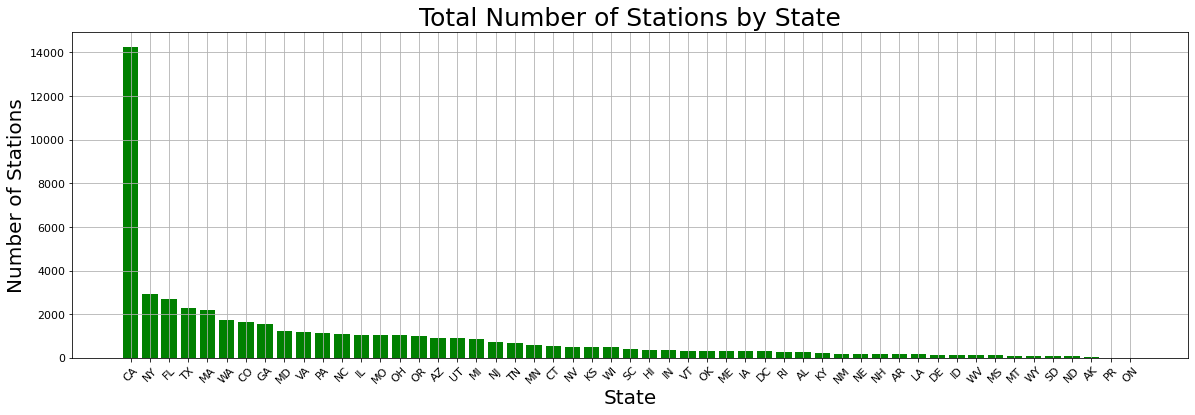

In [111]:
fig = plt.figure(figsize = (20,6))
plt.bar(xAxis,yAxis,color = "green")
plt.title('Total Number of Stations by State', fontsize = 25)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Number of Stations', fontsize = 20)
plt.xticks(rotation = 45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
plt.show()

In [112]:
file_path = ("C:/Users/adaiu/OneDrive/Desktop/Analysis Projects/Electric-Car-Data-Analysis/Resources/Charging Stations/alt_fuel_stations_Cleaned")
altfuel_df.to_csv(filepath)